<a href="https://colab.research.google.com/github/YooNayoung/ESAA/blob/main/PART3_Keras(6~7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **06. 모델 저장 및 불러오기** 

예제 실습을 위해 mnist 데이터셋을 불러오고, 앞에서 사용한 신경망 모델을 활용하여 모델 훈련을 먼저 완료시킴.

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드는 10개가 되어야 한다.
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10, 
            )

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2227 - accuracy: 0.9344 - val_loss: 0.1038 - val_accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0923 - accuracy: 0.9719 - val_loss: 0.0912 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0803 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0801 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0793 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0785 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - accuracy: 0.9901 - val_loss: 0.0951 - val_accuracy:

## **6-1. 모델을 파일로 저장**
- save(): 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장할 수 있음
- 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정
- .h5 확장자를 포함하는 경우 모델이 HDF5 포맷으로 저장됨  

In [3]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

## **6-2. 저장된 모델 복원**

- 저장된 HDF5 파일 형식의 모델을 복원 & 검증

In [4]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.08201, acc: 0.98080


- .h5 확장자를 생략하여 SavedModel 포맷으로 저장 후 다시 복원

In [6]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [7]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


- 복원된 모델의 성능은 두 포맷이 동일

In [8]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.08201, acc: 0.98080
saved_model] loss: 0.08201, acc: 0.98080


# **07. 복잡한 모델 생성**

## **7-1. 함수형 API(Functional API)**
- 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있음
- Sequential API와 다르게 Functional API는 복잡한 구조의 모델을 정의할 수 있음
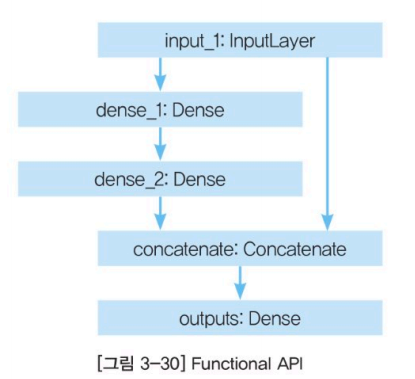

- Sequential API로 구현한 mnist 분류기 모델을 함수형 API로 동일하게 구현한 코드

In [9]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [10]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [11]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


- 복잡한 구조를 갖는 모델을 생성할 때 summary()로는 모델의 구조도를 시각화하기 어려움 
- plot_model 모듈을 활용하여 모델의 구조도 시각화

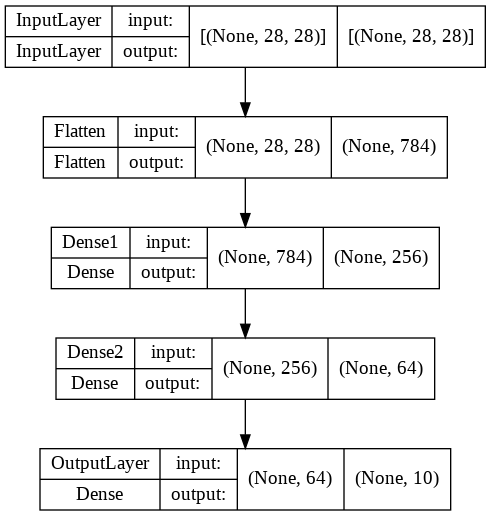

In [12]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [13]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2165 - accuracy: 0.9358
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885 - accuracy: 0.9724
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9809
Functional Model] loss: 0.09007, acc: 0.97040


## **7-2. 모델 서브클래싱(Model Subsclassing)**
- Model 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있음
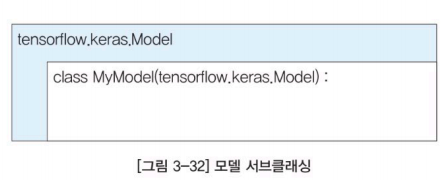

In [15]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [16]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2152 - accuracy: 0.9366
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0601 - accuracy: 0.9811
Subclassing Model] loss: 0.08310, acc: 0.97410


- Model Subsclassing으로 생성도니 모델의 훈련도 동일하게 compile() 메소드로 컴파일 후 fit() 메소드로 훈련함.
- 함수형 API와는 단지 모델을 생성하는 방식에 차이가 있음

## **7-3. 서브클래싱 모델 파라미터를 활용한 생성**
- Model Subsclassing의 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점
- 아래는 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제

In [18]:
class MyModel(tf.keras.Model):
    
    # 생성자 parameter 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [19]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2094 - accuracy: 0.9384
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0577 - accuracy: 0.9820
Subclassing Model w. parameters] loss: 0.07693, acc: 0.97570


- 이렇게 생성한 모델도 동일하게 compile() 메소드로 컴파일 한 뒤 fit() 메소드로 훈련함